In [47]:
import numpy as np
from scipy.stats import t as t_distribution
import matplotlib.pyplot as plt
from functools import partial

In [48]:
rng = np.random.default_rng(seed=405)

In [49]:
r = 0.05
delta = np.array([0.02, 0.02, 0.02])
sigma = np.array([0.3, 0.3, 0.3])
#rho = 0.2
corr_matrix = np.array([[1, 0.2, 0.2],
                       [0.2, 1, 0.2],
                       [0.2, 0.2, 1]])
#S0_1 = 100
#S0_2 = 100
#S0_3 = 100
S0 = np.array([100, 100, 100])
K = 100
T = 1
N = 1000 # number of simulations
q = 0.95 # confidence interval
seed = 405

In [50]:
def price(r, delta, sigma, corr_matrix, S0, K=100, T=1, N=1000, q=0.95, seed=405):
    d = len(S0)

    if not(len(S0.shape) == 1 and
           delta.shape == (d,) and
           sigma.shape == (d,) and
           corr_matrix.shape == (d, d)):
        raise ValueError('Check shapes of inputs')
    rng = np.random.default_rng(seed=seed)
    b = np.linalg.cholesky(corr_matrix * T)
    Z = rng.normal(size=(d, N))
    Z = b @ Z
    ST = S0 * np.ones((N, d)) * np.exp((r - delta - sigma**2 / 2) * T + sigma * np.sqrt(T) * Z.T)
    ST = ST.T

    if d != 3:
        raise ValueError('by condition d=3')
    payoff = np.maximum(ST[0] + ST[1] - ST[2] - K, 0)
    price = np.exp(-r * T) * payoff
    return np.mean(price), np.std(price) * t_distribution.ppf(q, N-1) / np.sqrt(N)

In [51]:
price(r, delta, sigma, corr_matrix, S0, K, T, N=100000, seed=405)

(np.float64(20.344181397390937), np.float64(0.16374689442092533))

In [52]:
price_test = partial(price, r=r, delta=delta, sigma=sigma, corr_matrix=corr_matrix, S0=S0, K=K, T=T, q=q, seed=seed)
price_test = np.vectorize(price_test)

In [53]:
price_test(N=20000)

(array(20.45844472), array(0.36717745))

In [54]:
NN = np.logspace(2, 6, 20, dtype=int)
results = price_test(N=NN)

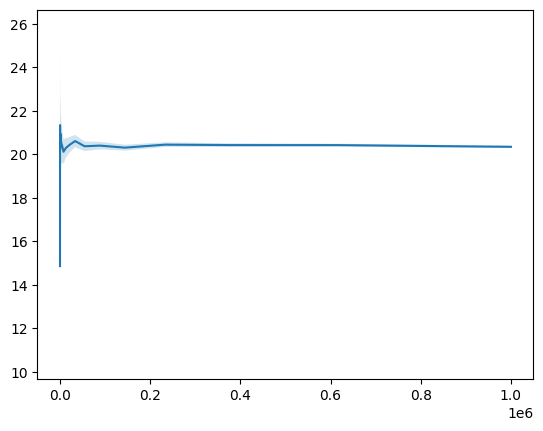

In [55]:
plt.plot(NN, results[0])
plt.fill_between(NN, results[0] + results[1], results[0] - results[1], alpha=0.2)
plt.show()

In [56]:
import pandas as pd
confidence_interval = [f'[{a - b :.3f}, {a + b :.3f}]' for a, b in zip(results[0], results[1])]
df = pd.DataFrame({'N': NN, 'price': results[0], 'confidence interval': confidence_interval})
df

,N,price,confidence interval
0,100,14.855252,"[10.430, 19.281]"
1,162,21.341587,"[16.797, 25.886]"
2,263,20.221823,"[16.828, 23.616]"
3,428,20.739139,"[18.053, 23.425]"
4,695,20.519836,"[18.534, 22.506]"
5,1128,20.938873,"[19.389, 22.489]"
6,1832,20.706029,"[19.496, 21.916]"
7,2976,20.507752,"[19.563, 21.453]"
8,4832,20.390488,"[19.648, 21.133]"
9,7847,20.113571,"[19.539, 20.688]"
